In [120]:
# Residual Plotter
# Used to compare the image errors with a gaussian distribution
# Takes data from the QLens "fit output_chivals" command.

In [121]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
from scipy import special
import seaborn as sns
%matplotlib inline

In [122]:
print( os.getcwd())

/Users/kevin/CloudStation/KEVIN/UCI/Research/gravlensing/Python


In [123]:
name = 'MS2137'
profile = 'Corecusp'  # This appears in the title
suf1 = '.cc.v13'
suf2 = '.fit_chivals.dat'
basepath = '/Users/kevin/CloudStation/KEVIN/UCI/Research/gravlensing/'

In [124]:
datapath = basepath + name + '/'
assert os.path.exists(datapath + name + suf1 + suf2), 'Missing ' + str(datapath + name + suf1 + suf2)

In [125]:
with open(datapath + name + suf1 + suf2, 'r') as file:
    chivals = []
    for line in file:
        if line and '#' not in line[0:2]:
            chivals.append([float(i) for i in line.split()])
chivals = np.array(chivals)
# QLens' output_chival file has these columns: chi, fraction(>chi), model_x, model_y, data_x, data_y
# Note that each point is on the list twice, once for x and once for y.

chi, f, mx, my, dx, dy = chivals.T

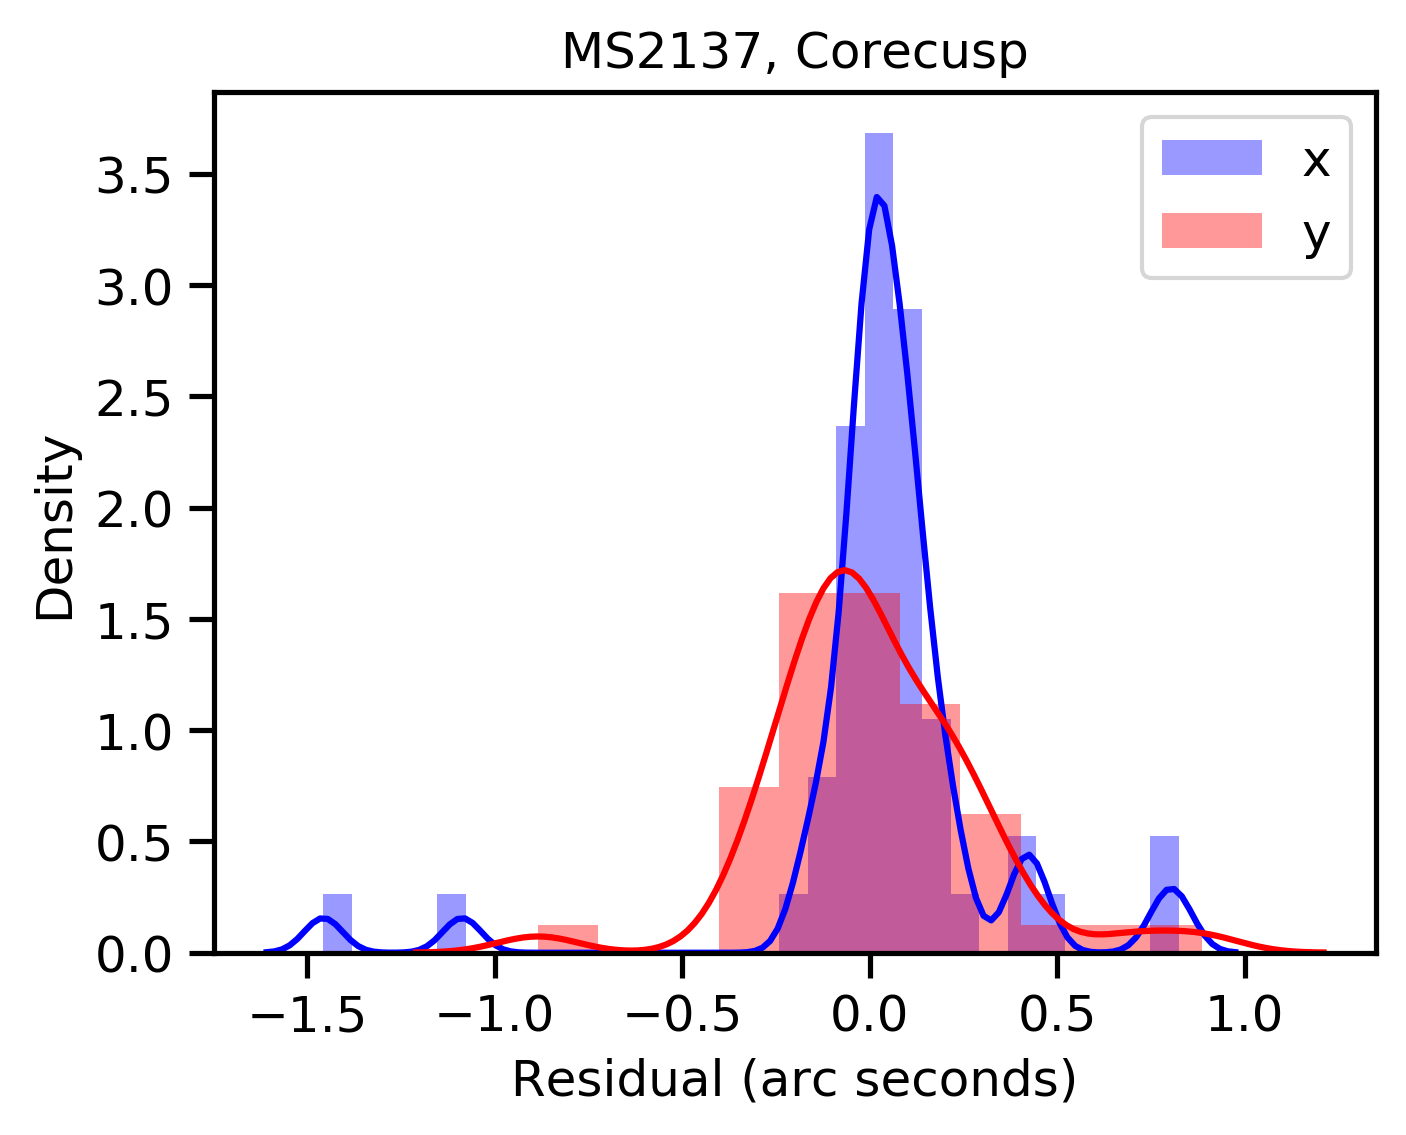

In [126]:
plt.rcParams["figure.dpi"] = 300
plt.rcParams.update({'legend.fontsize': 'large',
          'figure.figsize': (5, 3.8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
          'legend.frameon': True })


fig = plt.gcf()
chi_x_sign = np.asarray(sorted((mx - dx)))[::2] 
chi_y_sign = np.asarray(sorted((my - dy)))[::2] 
# gr = np.linspace(-6, 6)
# gaussian =  np.asarray(np.exp(-(gr)**2 / (2 * 1.5**2)))

sns.distplot(chi_x_sign, label='x', color="blue", hist=True)
sns.distplot(chi_y_sign, label= 'y', color="red", hist=True)
# plt.plot(gr, np.sqrt(2 * sigma**2)**-1 * gaussian, \
#          label=r'Gaussian: $\frac{1}{\sqrt{2\sigma^2}}e^{-\chi^2/(2\sigma^2)}, with\; \sigma=$'\
#          + str(sigma) + '"', color="green", linestyle=':')
plt.title(name + ', ' + profile)
plt.xlabel('Residual (arc seconds)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [127]:
sys.exit()

SystemExit: 

In [128]:
savename = datapath + name + suf1 + '.residualplot.png'
fig.savefig(savename, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='png',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

/Users/kevin/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


In [129]:
# copy to the 'residual plots' folder
os.system('cp ' + savename + ' "' + basepath + 'residual plots/"')

0